In [ ]:
import nltk
nltk.download('all')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

In [ ]:
import pandas as pd
data = pd.read_csv('/content/post_yellowknife_evacuation - Sheet1.csv')
print(data.head())

                                           poster  \
0                       Yellowknife House Sitting   
1       Yellowknife's Rants & Raves 2.0 (Rated E)   
2  Families With Pets Evacuating Yellowknife 2023   
3                                      Gracie Ann   
4                                  Alannah Monica   

                                             Content  Likes & loves  \
0  H here!i became a full-time housesitter as of ...           66.0   
1  Are evacuation insurance claims will result in...            2.0   
2  Hey folks, a number of crates were loaned out ...            4.0   
3  Volunteers preparing food hampers Edit! These ...            NaN   
4  Thank you guys for the concern on the Yellowkn...           66.0   

      comments       shares  
0  21 comments     2 shares  
1  28 comments     2 shares  
2   2 comments     5 shares  
3  57 comments    24 shares  
4  15 comments  15 comments  


In [ ]:
print(data.columns)

Index(['poster', 'Content', 'Likes & loves', 'comments', 'shares'], dtype='object')


# Data Cleaning

In [ ]:
print(data['Likes & loves'].isna().sum())
print(data['poster'].isna().sum())

20
4


In [ ]:
# fillna values for likes & loves column and poster column using iloc function
data.iloc[:, 3:4] = data.iloc[:, 3:4].fillna(0)
data.iloc[:, 0:1] = data.iloc[:, 0:1].fillna('Anonymous')
print(data.iloc[:, 3:4].isna().sum())
print(data.iloc[:, 5:6].isna().sum())

comments    0
dtype: int64
Series([], dtype: float64)


In [ ]:
print(data.iloc[:, 3:4])
print(data.iloc[:, 0:1])

       comments
0   21 comments
1   28 comments
2    2 comments
3   57 comments
4   15 comments
..          ...
94      1 share
95      1 share
96            0
97   2 comments
98  18 comments

[99 rows x 1 columns]
                                               poster
0                           Yellowknife House Sitting
1           Yellowknife's Rants & Raves 2.0 (Rated E)
2      Families With Pets Evacuating Yellowknife 2023
3                                          Gracie Ann
4                                      Alannah Monica
..                                                ...
94                        Yellowknife Women's Society
95  Concerned Yellowknife Residents for a Day Shel...
96                                          Anonymous
97                               Wesclean Yellowknife
98                           Mahalia Yakeleya Newmark

[99 rows x 1 columns]


# Data pre-processing

In [ ]:
def preprocess_text(text):

    # Tokenize the text

    tokens = word_tokenize(text.lower())




    # Remove stop words

    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]




    # Lemmatize the tokens

    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]




    # Join the tokens back into a string

    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

In [ ]:
data['Content'] = data['Content'].apply(preprocess_text)
print(data['Content'])

0     h ! became full-time housesitter august 1st ( ...
1     evacuation insurance claim result increased po...
2     hey folk , number crate loaned yellowknife eva...
3     volunteer preparing food hamper edit ! hamper ...
4     thank guy concern yellowknife evacuation.i 'm ...
                            ...                        
94    yellowknife woman 's society share spruce boug...
95    helpful timeline learn experience yellowknife ...
96    ’ put together timeline experience evacuation ...
97    ’ trying support local small business christma...
98    surreal experience lifting yellowknife smoke ....
Name: Content, Length: 99, dtype: object


#Sentiment Analysis

In [ ]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()


# create get_sentiment function

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['pos'] > 0 else 0

    return sentiment


# apply get_sentiment function

data['sentiment'] = data['Content'].apply(get_sentiment)
print(data['sentiment'])

0     0
1     1
2     1
3     1
4     1
     ..
94    1
95    1
96    1
97    1
98    1
Name: sentiment, Length: 99, dtype: int64


In [ ]:
# Change the value of 0 to negative string and 1 to positive string in data['sentiment']

data['sentiment'] = data['sentiment'].replace([0, 1], ['negative', 'positive'])


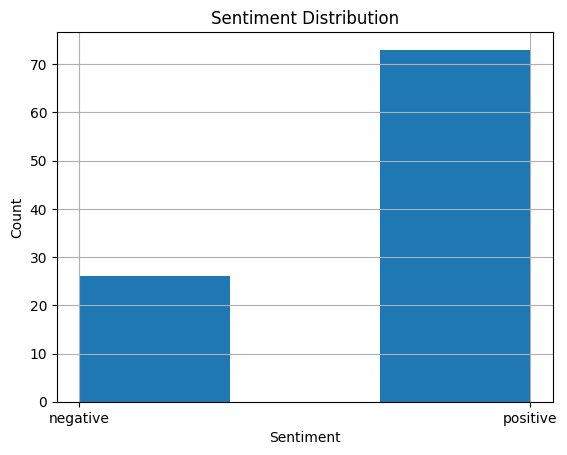

In [ ]:
# Plot a histogram for data['sentiment']

import matplotlib.pyplot as plt
data['sentiment'].hist(bins=3)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()
